In [3]:
import torch
from torch import nn
from torch import optim

import matplotlib.pyplot as plt

In [4]:
from utilities.utilities import *
from utilities.diffGrad import *
from models.FCN import *
from models.FourierFCN import FourierFCN2D

In [95]:
size = 100
dim = 1
epochs = 1000

In [96]:
equations = {
    'equation-1': {
        'points': get_points(fixed={}, size=size, dim=dim),
        'derivatives': [(0, 0)],
        'phi': lambda u: u,
        'psi': lambda x: torch.sin(x),
        'regularization': 1.0
    },
    'boundary': {
        'points': get_points(fixed={0: 0.0}, size=size, dim=dim),
        'derivatives': [(0, )],
        'phi': lambda u: u,
        'psi': lambda x: torch.tensor([[-1.0]], dtype=torch.float),
        'regularization': 1.0
    },
}

In [107]:
net = FCN(input_dim=1, output_dim=1, layers_num=1, layer_size=25)

phi = lambda x: net(x)

errors, info = training(phi, equations, epochs=epochs, optimizer=optim.AdamW, parameters=net.parameters())

100%|██████████| 1001/1001 [00:01<00:00, 571.91it/s]


In [108]:
errors[-1]

4.13493125961395e-06

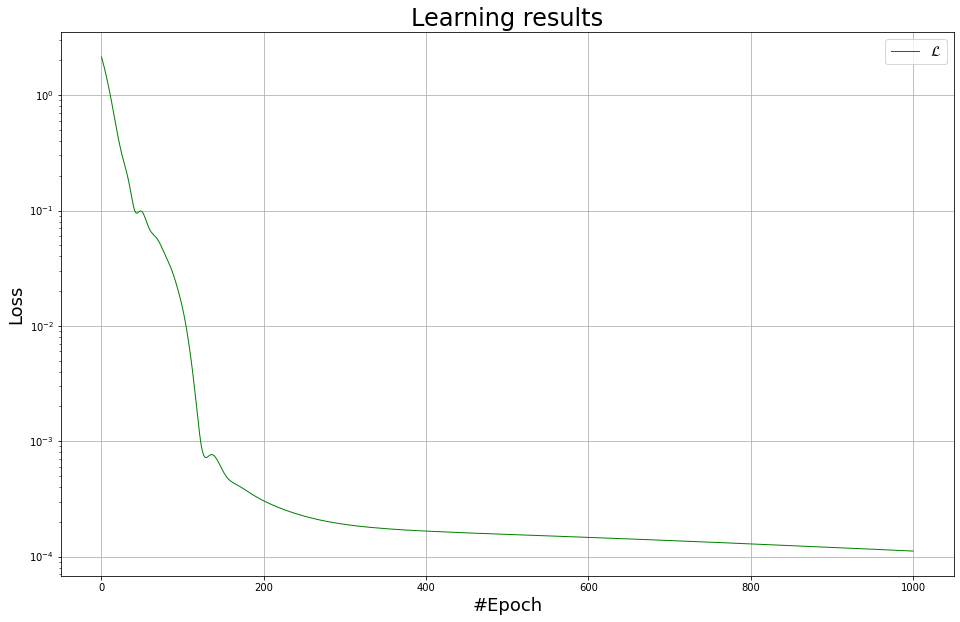

In [104]:
plot_error(errors, epochs=epochs)

In [100]:
x = get_points(dim=dim, size=size)
y = phi(x).cpu().detach().numpy()
x = x.cpu().detach().numpy()

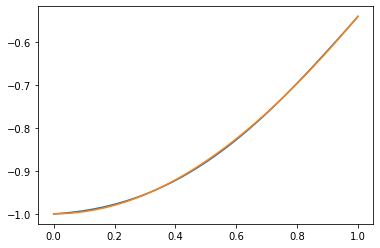

In [101]:
plt.plot(x, y)
plt.plot(x, -np.cos(x))